In [1]:
# řešení úkolu 2
# Machine Learning - Support Vector Machine algoritmus pro detekování správných číslic z ručně psaných obrázků
# Zpracovala Kateřina Chmelařová
# 6.června 2024
# Úkol 2 - Python pro datovou vědu


In [ ]:
# Níže rekapitulace zadání


Ve strojovém učení často pracujeme i s jinými než textovými daty, například s obrázky. Práci s obrázky si vyzkoušíš v tomto úkolu. Jedním z nejznámějších datasetů je MNIST, který obsahuje obrázky rukou psaných číslic. K obrázkou jsou k dispozici i labels, tj. čísla, která na obrázku jsou. Tento dataset je přímo součástí modulu scikitlearn, a to ve formě číselné matice. Obrázky mají nízké rozlišení (8x8 pixelů, tj. každý obrázek se skládá 64 "políček" - 8 políček v 8 řádích, kterým lze přiřadit barvu) a je černobílý.

Tvým úkolem bude vytvořit model, který dokáže rozpoznat, jaké číslo je na každém z obrázků, přičemž využijeme algoritmus Support Vector Machine (SVM). Dataset si můžeš načíst s využitím následujícího kódu. Kód uloží data, která chceme zpracovat, do proměnné data. Čísla, která na obrázích skutečně jsou (tj. správné odpovědi) jsou v proměnné y.

In [254]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [111]:

digits = datasets.load_digits()
y = digits.target
data = digits.images

Níže je například matice, která reprezentuje první (v řeči Pythonu nultý) obrázek. Čím vyšší číslo je, tím tmavší je políčko. Čísla jsou v rozsahu 0 až 15.

In [107]:
array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

NameError: name 'array' is not defined

Níže je obrázek, který je touto maticí reprezentován. Asi bychom ho odhadli jako 0, což je i správná odpověď.

![ukol_obrazky/ukol_2_obr_1.png](ukol_obrazky/ukol_2_obr_1.png)

Obrázek byl vytvořen pomocí modulu matplotlib a funkce imshow, která vykreslí číselnou matici jako obrázek. Pokud vybereme obrázek na pozici 0 a nastavíme černobílé barevné schéma (cmap=plt.cm.gray_r), získáme obrázek, který byl výše.

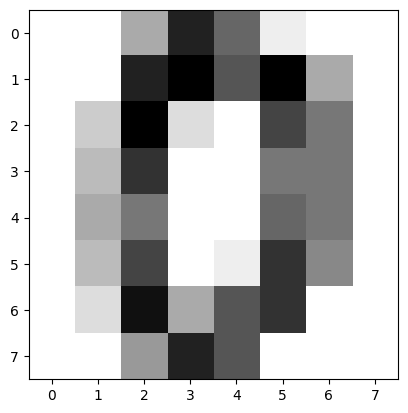

In [108]:
plt.imshow(data[0], cmap=plt.cm.gray_r)

Správnou odpověď najdeme v poli y též na pozici 0.



In [109]:
y[0]

0

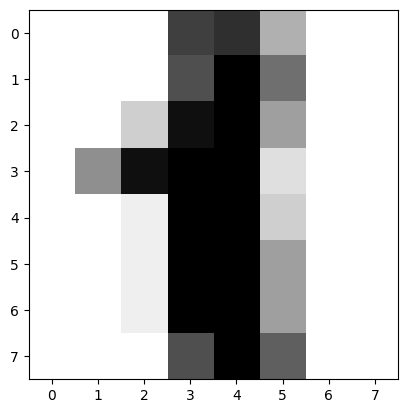

In [110]:
plt.imshow(data[1], cmap=plt.cm.gray_r)

Poslední krok je často označován převod dat na flat, tj. na plochá data. Nyní je totiž každé číslo reprezentováno dvourozměrnou maticí 8x8, ale pro použití algoritmu SVC potřebujeme, aby bylo každé číslo reprezentováno jednorozměrně. Můžeš si to představit tak, že chceme, aby každé číslo bylo reprezentováno jedním řádkem v tabulce, která má 64 sloupců.

Můžeme si to ukázat na číslu, které jsme si prohlíželi. Níže je číslo převedené do jednorozměrné formy. Když si čísla porovnáš s předchozím zápisem formou matice, uvidíš stejná čísla, ale pouze jeden pár hranatých závorek. To značí, že jde o jednorozměrné pole, tj. všechna čísla jsou v jednom řádku.

In [100]:
array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10., 15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4., 12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8., 0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5., 10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])


NameError: name 'array' is not defined

Tento převod byl proveden pomocí metody reshape(-1), které jsme dali parametr -1, což vede k tomu, že výsledkem je jednorozměrné pole.

In [101]:
data[0].reshape(-1)

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

My ale potřebujeme převést všechna čísla, to uděláme příkazem níže. Hodnotou na nulté pozici seznamu říkáme, kolik máme v našem souboru pozorování, takže metoda reshape() vytvoří samostatný řádek každému z čísel.

In [102]:
n_samples = len(data)
data = data.reshape([n_samples, -1])

Nyní je již řada na tobě. Napiš kód, kterým vytvoříš model, který bude klasifikovat obrázek do správné skupiny. Kód je velice blízký tomu, který jsme používali v lekci. Jinými slovy, stačí ti podívat se to materiálů k lekci, není potřeba nic Googlit nebo používat ChatGPT. Ale zakázané to samozřejmě není.

Rozděl data na testovací a trénovací pomocí metody train_test_split, přičemž nastav parametry test_size=0.3 a random_state=42. Použij stejné názvy proměnných, jaké jsme používali v lekci, tj. X_train, X_test, y_train, y_test.
Použij klasifikátor SVC a jako kernel použij linear. Parametr decision_function_shape nenastavuj a využij výchozí hodnotu, tj. ovo. Nenastavuj ani žádné další parametry.
Natrénuj model s využitím metody fit() a nakonec metodou predict() vytvoř pole predikcí pro testovací data, které pojmenuj y_pred.
Zjisti hodnotu metriky accuracy (měla by ti vyjít přibližně 0.9796) a matici záměn.



![ukol_obrazky/ukol_2_obr_2.png](ukol_obrazky/ukol_2_obr_2.png)

Nepovinný bonus
Algoritmus u některých obrázků nefungoval, určitě bude zajímavé si tyto obrázky prohlédnout. K tomu je potřeba doplnit následující kód, který vlož do svého programu. Na místa označená 1 a 2 je potřeba doplnit kód. Pokud vše doplníš správně, vytvoří ti program několik obrázků, které obsahují špatně predikované obrázky.

In [103]:
for i in range(0, len(y_pred)):
    # 1 Napiš podmínku, která porovná predikovanou hodnotu pro i-tý obrázek a skutečnou hodnotu pro i-tý obrázek
    if :
        image = # 2 sem dej načtení i-tého obrázku z proměnné X_test
        # Obrázek převedeme zpět na matici 8x8
        image = image.reshape(8, 8)
        # Příkaz na zobrazení obrázku
        plt.imshow(image, cmap=plt.cm.gray_r)
        # Grafu dáme titulek, který porovnává predikovanou a skutečnou hodnotu
        plt.title(f'Predicted: {y_pred[i]}, Actual: {y_test[i]}')
        # Obrázek uložíme do souboru
        plt.savefig(f"{i}.png")

SyntaxError: invalid syntax (864280337.py, line 3)

Níže je příklad jednoho z nich. Například toto bychom na 9 netipli asi ani my...



![ukol_obrazky/11.png](ukol_obrazky/11.png)

In [61]:
# řešení
# Zpracovala Kateřina Chmelařová
# 6.června 2024
# Úkol 2 - Python pro datovou vědu

In [218]:
digits = datasets.load_digits()
y = digits.target
data = digits.images

In [219]:
data

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [220]:
data.shape

(1797, 8, 8)

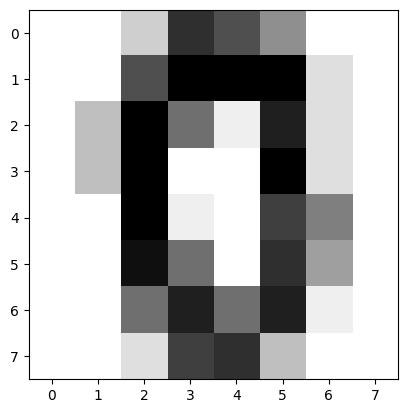

In [221]:
plt.imshow(data[20], cmap=plt.cm.gray_r)

In [222]:
y[0]

0

In [223]:
data[0] # matice 8x8

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [224]:
y[10]

0

In [225]:
data[0].reshape(-1) # reshape převede data na jeden dlouhý řádek s 64 sloupci



array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [226]:
n_samples = len(data)
data = data.reshape([n_samples,-1])

In [227]:
data


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [228]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Rozděl data na testovací a trénovací pomocí metody train_test_split, přičemž nastav parametry test_size=0.3 a random_state=42.
Použij stejné názvy proměnných, jaké jsme používali v lekci, tj. X_train, X_test, y_train, y_test.
Použij klasifikátor SVC a jako kernel použij linear. 

Parametr decision_function_shape nenastavuj a využij výchozí hodnotu, tj. ovo. Nenastavuj ani žádné další parametry. Natrénuj model s využitím metody fit() a nakonec metodou predict() vytvoř pole predikcí pro testovací data, které pojmenuj y_pred. Zjisti hodnotu metriky accuracy (měla by ti vyjít přibližně 0.9796) a matici záměn.

In [274]:
digits = datasets.load_digits()
y = digits.target
data = digits.images

#data.shape
#plt.imshow(data[20], cmap=plt.cm.gray_r)
#y[0]

n_samples = len(data)
data = data.reshape([n_samples,-1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
               
clf = SVC(kernel="linear")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))


0.9796296296296296


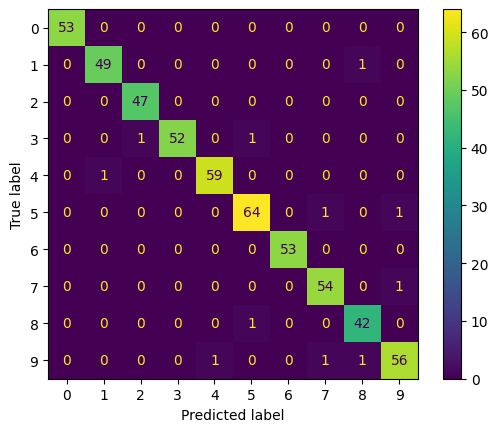

In [275]:
ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
)

In [271]:
# Model nám rozdělil obrázky do správných skupin. Jeho výsledná přesnost byla 0.9796296296296296 tj. 97,96%. 
# Jak můžeme vdět v matici záměn, občas se stalo, že např. model predikoval, že je to 8, zatímco to byla 9. Je to ale celkově poměrně přesný model.

In [265]:
# Nepovinná část

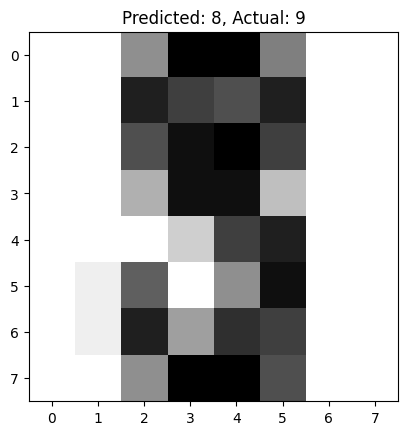

In [281]:
for i in range(0, len(y_pred)):
    # 1 Napiš podmínku, která porovná predikovanou hodnotu pro i-tý obrázek a skutečnou hodnotu pro i-tý obrázek
    if y_pred[i] != y_test[i]:
        image = X_test[i]# 2 sem dej načtení i-tého obrázku z proměnné X_test
        # Obrázek převedeme zpět na matici 8x8
        image = image.reshape(8, 8)
        # Příkaz na zobrazení obrázku
        plt.imshow(image, cmap=plt.cm.gray_r)
        # Grafu dáme titulek, který porovnává predikovanou a skutečnou hodnotu
        plt.title(f'Predicted: {y_pred[i]}, Actual: {y_test[i]}')
        # Obrázek uložíme do souboru
        plt.savefig(f"{i}.png")

In [ ]:
# Povedlo se to správně doplnit a program mi vygeneroval 11 obrázků, kde se model zpletl. 
# Což odpovídá i počtu chyb v confusion matrix.